In [1]:
import torch
from torch import nn
import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

In [2]:
torch.__version__, torchvision.__version__

('2.3.1+cu121', '0.18.1+cu121')

## Getting a datasets

In [3]:
# Setup training data
train_data = datasets.FashionMNIST(
    root = "data", # path folder name
    train = True,
    download = True,
    transform = ToTensor(),
    target_transform = None
)

test_data = datasets.FashionMNIST(
    root = "data",
    train = False,
    download = True,
    transform = ToTensor(),
    target_transform = None
)

100%|██████████| 26421880/26421880 [00:02<00:00, 9714963.56it/s] 


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 173033.70it/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:04<00:00, 1013998.96it/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 16558494.63it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [4]:
len(train_data), len(test_data)

(60000, 10000)

In [5]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [6]:
class_to_idx = train_data.class_to_idx
class_to_idx # class names index

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [7]:
image, label = train_data[0]
image.shape, label # [channel, height, width]

(torch.Size([1, 28, 28]), 9)

### Visualizing our data

torch.Size([1, 28, 28])


(-0.5, 27.5, 27.5, -0.5)

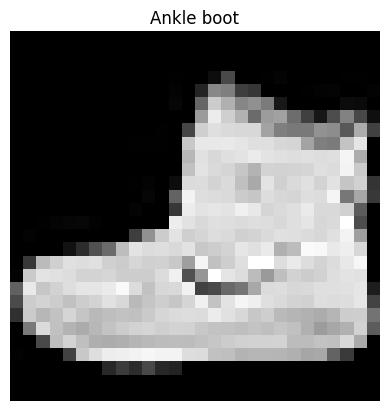

In [8]:
import matplotlib.pyplot as plt
image, label = train_data[0]
print(image.shape)
plt.imshow(image.squeeze(), cmap = "gray")
plt.title(class_names[label])
plt.axis("off")

In [9]:
train_data, test_data

(Dataset FashionMNIST
     Number of datapoints: 60000
     Root location: data
     Split: Train
     StandardTransform
 Transform: ToTensor(),
 Dataset FashionMNIST
     Number of datapoints: 10000
     Root location: data
     Split: Test
     StandardTransform
 Transform: ToTensor())

## Prepare DataLoader

In [10]:
from torch.utils.data import DataLoader

BATCH_SIZE = 32

# turn data into iterables (batches)
train_dataloader = DataLoader(
    dataset = train_data,
    batch_size = BATCH_SIZE,
    shuffle = True
)

test_dataloader = DataLoader(
    dataset = test_data,
    batch_size = BATCH_SIZE,
    shuffle = False
)

In [11]:
train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7a8ddb71fca0>,
 <torch.utils.data.dataloader.DataLoader at 0x7a8ddb71e8c0>)

In [12]:
len(train_dataloader), len(test_dataloader)

(1875, 313)

In [13]:
60000/32

1875.0

In [14]:
train_batch, train_batch_label = next(iter(train_dataloader)) # taking one batch
train_batch.shape

torch.Size([32, 1, 28, 28])

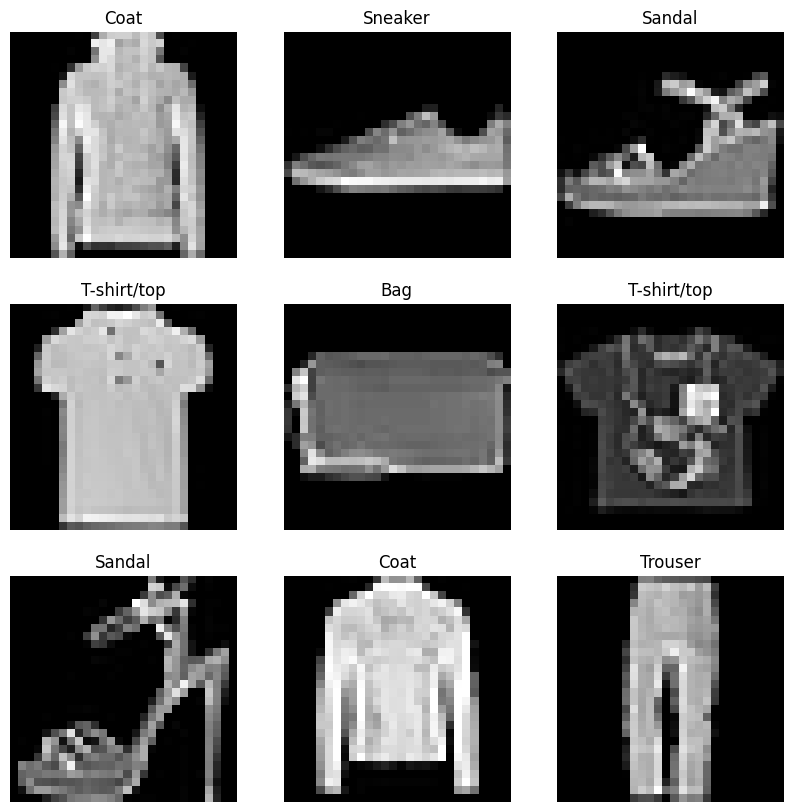

In [15]:
plt.figure(figsize = (10,10))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(train_batch[i].squeeze(),cmap = "gray")
    plt.title(class_names[train_batch_label[i]])
    plt.axis("off")

## Model 0

In [16]:
flatten_model = nn.Flatten()

x = train_batch[0]

output = flatten_model(x)
x.shape, output.shape

(torch.Size([1, 28, 28]), torch.Size([1, 784]))

In [17]:
class FashionMNISTModelV0(nn.Module):
    def __init__(self,
                 input_shape : int,
                 hidden_units : int,
                 output_shape : int):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features = input_shape, out_features = hidden_units),
            nn.Linear(in_features = hidden_units, out_features = output_shape)
        )


    def forward(self, x):
        return self.layer_stack(x)

In [18]:
torch.manual_seed(42)

model_0 = FashionMNISTModelV0(input_shape = 28*28,
                              hidden_units = 10,
                              output_shape = len(class_names)).to("cpu")

model_0

FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [19]:
model_0.state_dict()

OrderedDict([('layer_stack.1.weight',
              tensor([[ 0.0273,  0.0296, -0.0084,  ..., -0.0142,  0.0093,  0.0135],
                      [-0.0188, -0.0354,  0.0187,  ..., -0.0106, -0.0001,  0.0115],
                      [-0.0008,  0.0017,  0.0045,  ..., -0.0127, -0.0188,  0.0059],
                      ...,
                      [-0.0116,  0.0273, -0.0344,  ...,  0.0176,  0.0283, -0.0011],
                      [-0.0230,  0.0257,  0.0291,  ..., -0.0187, -0.0087,  0.0001],
                      [ 0.0176, -0.0147,  0.0053,  ..., -0.0336, -0.0221,  0.0205]])),
             ('layer_stack.1.bias',
              tensor([-0.0093,  0.0283, -0.0033,  0.0255,  0.0017,  0.0037, -0.0302, -0.0123,
                       0.0018,  0.0163])),
             ('layer_stack.2.weight',
              tensor([[ 0.0614, -0.0687,  0.0021,  0.2718,  0.2109,  0.1079, -0.2279, -0.1063,
                        0.2019,  0.2847],
                      [-0.1495,  0.1344, -0.0740,  0.2006, -0.0475, -0.2514, -0.

In [20]:
## loss and optimizer

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params = model_0.parameters(),
                            lr = 0.1)

In [21]:
!wget https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py

--2024-07-27 20:00:50--  https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10160 (9.9K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]   9.92K  --.-KB/s    in 0s      

2024-07-27 20:00:50 (113 MB/s) - ‘helper_functions.py’ saved [10160/10160]



In [22]:
from helper_functions import accuracy_fn

In [23]:
# Calculate time
from timeit import default_timer as timer

def print_train_time(start : float,
                     end : float,
                     device : torch.device = None):
    total_time = end - start
    print(f"Train Time on {device} : {total_time:.3f} seconds")
    return total_time



In [24]:
start_time = timer()
# ...code ...
end_time = timer()
print_train_time(start = start_time,
                 end = end_time,
                 device = "cpu")

Train Time on cpu : 0.000 seconds


2.7886999987458694e-05

In [25]:
# info
for batch, (image, label) in enumerate(train_dataloader):
    print(batch," ", end = '')

0  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99  100  101  102  103  104  105  106  107  108  109  110  111  112  113  114  115  116  117  118  119  120  121  122  123  124  125  126  127  128  129  130  131  132  133  134  135  136  137  138  139  140  141  142  143  144  145  146  147  148  149  150  151  152  153  154  155  156  157  158  159  160  161  162  163  164  165  166  167  168  169  170  171  172  173  174  175  176  177  178  179  180  181  182  183  184  185  186  187  188  189  190  191  192  193  194  195  196  197  198  199  200  201  202  203  204  205  206  207  208  209  210  211  212  213  214  215  216  217  218  219  220  221  

In [26]:
for batch, (image, label) in enumerate(train_dataloader):
    print(len(image), " ", end = "")

32  32  32  32  32  32  32  32  32  32  32  32  32  32  32  32  32  32  32  32  32  32  32  32  32  32  32  32  32  32  32  32  32  32  32  32  32  32  32  32  32  32  32  32  32  32  32  32  32  32  32  32  32  32  32  32  32  32  32  32  32  32  32  32  32  32  32  32  32  32  32  32  32  32  32  32  32  32  32  32  32  32  32  32  32  32  32  32  32  32  32  32  32  32  32  32  32  32  32  32  32  32  32  32  32  32  32  32  32  32  32  32  32  32  32  32  32  32  32  32  32  32  32  32  32  32  32  32  32  32  32  32  32  32  32  32  32  32  32  32  32  32  32  32  32  32  32  32  32  32  32  32  32  32  32  32  32  32  32  32  32  32  32  32  32  32  32  32  32  32  32  32  32  32  32  32  32  32  32  32  32  32  32  32  32  32  32  32  32  32  32  32  32  32  32  32  32  32  32  32  32  32  32  32  32  32  32  32  32  32  32  32  32  32  32  32  32  32  32  32  32  32  32  32  32  32  32  32  32  32  32  32  32  32  32  32  32  32  32  32  32  32  32  32  32  32  32  32  32  32  

In [27]:
len(train_dataloader.dataset)

60000

In [28]:
len(train_dataloader)

1875

In [29]:
str(next(model_0.parameters()).device)

'cpu'

### Training Model

1. Loop through epochs
2. Loop through training batchers, perform training steps, calculate train loss per batch
3. Loop through testing batchers, perform testing steps, calculate test loss per batch
4. print information
5. Time

In [30]:
# Progress bat
from tqdm.auto import tqdm

# Set the seed
torch.manual_seed(42)

train_time_start_on_cpu = timer()

# Set number of epochs
epochs = 3

# Create training and test loop
for epoch in tqdm(range(epochs)):
    print(f"Epoch : {epoch}\n---------")

    ## Training
    train_loss = 0

    ## Add a loop to loop through the training batches
    for batch, (x_train, y_train) in enumerate(tqdm(train_dataloader, colour="Orange")): # per batch 32 images
        model_0.train() # Train mode

        # 1. Forward Pass
        y_pred = model_0(x_train)

        # 2. Calculate the loss (per batch)
        loss = loss_fn(y_pred,y_train)
        train_loss += loss

        # 3. Optimizer
        optimizer.zero_grad()

        # 4. loss backward
        loss.backward()

        # 5. optimizer step
        optimizer.step()

        # Print
        if batch % 400 == 0:
            print(f"Looked at {batch * len(x_train)}/{len(train_dataloader.dataset)} samples.")

    # Divide total train loss by lenght of train dataloader
    train_loss = train_loss / len(train_dataloader)

    ## Testing
    test_loss, test_acc = 0, 0
    model_0.eval()

    with torch.inference_mode():
        for x_test, y_test in test_dataloader:
            # 1. Forward pass
            test_pred = model_0(x_test) # return logits

            # 2. calculate loss and accuracy
            test_loss += loss_fn(test_pred,y_test)
            test_acc += accuracy_fn(y_true = y_test,
                                    y_pred = test_pred.argmax(dim=1))

        # calculate the test loss averate per batch
        test_loss /= len(test_dataloader)

        # calcualte the test acc averate per batch
        test_acc /= len(test_dataloader)

    # Print
    print(f"Train Loss : {train_loss:.5f} | Test Loss : {test_loss:.5f} | Test Acc : {test_acc:.5f}\n")
# for loop end

# calcualte training time
train_time_end_on_cpu = timer()
total_train_time_on_cpu = print_train_time(start = train_time_start_on_cpu,
                                               end = train_time_end_on_cpu,
                                               device = str(next(model_0.parameters()).device))



  0%|          | 0/3 [00:00<?, ?it/s]

Epoch : 0
---------


  0%|          | 0/1875 [00:00<?, ?it/s]

Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.
Train Loss : 0.58934 | Test Loss : 0.54683 | Test Acc : 80.61102

Epoch : 1
---------


  0%|          | 0/1875 [00:00<?, ?it/s]

Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.
Train Loss : 0.47645 | Test Loss : 0.48865 | Test Acc : 82.69768

Epoch : 2
---------


  0%|          | 0/1875 [00:00<?, ?it/s]

Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.
Train Loss : 0.45409 | Test Loss : 0.46739 | Test Acc : 83.63618

Train Time on cpu : 32.395 seconds


## Make Prediction

In [31]:
torch.manual_seed(42)

def eval_model(model : torch.nn.Module,
               data_loader : torch.utils.data.DataLoader,
               loss_fn : torch.nn.Module,
               accuracy_fn):
    loss, acc = 0, 0
    model.eval()
    with torch.inference_mode():
        for x, y in tqdm(data_loader):
            y_pred = model(x)

            loss += loss_fn(y_pred,y)
            acc += accuracy_fn(y_true = y,
                               y_pred = y_pred.argmax(dim = 1))

        loss /= len(data_loader)
        acc /= len(data_loader)

    return {"Model_name" : model.__class__.__name__,
            "Model_loss" : f"{loss:.5f}",
            "Model_acc" : f"{acc:.2f}%"}

In [32]:
model_0_result = eval_model(model = model_0,
                            data_loader = test_dataloader,
                            loss_fn = loss_fn,
                            accuracy_fn = accuracy_fn)
model_0_result

  0%|          | 0/313 [00:00<?, ?it/s]

{'Model_name': 'FashionMNISTModelV0',
 'Model_loss': '0.46739',
 'Model_acc': '83.64%'}

## Training Model using GPU

In [33]:
!nvidia-smi

Sat Jul 27 20:01:42 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   40C    P8               9W /  70W |      3MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [34]:
torch.cuda.is_available()

True

In [35]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

## Model 1 (Non-Linear)

In [36]:
class FashionMNISTModelV2(nn.Module):
    def __init__(self,
                 input_shape : int,
                 hidden_units : int,
                 output_shape : int):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features = input_shape, out_features = hidden_units),
            nn.ReLU(),
            nn.Linear(in_features = hidden_units, out_features = output_shape),
            nn.ReLU()
        )


    def forward(self, x : torch.Tensor):
        return self.layer_stack(x)

In [37]:
model_1 = FashionMNISTModelV2(input_shape = 28*28,
                             hidden_units = 10,
                             output_shape = len(class_names)).to(device)
model_1

FashionMNISTModelV2(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): ReLU()
    (3): Linear(in_features=10, out_features=10, bias=True)
    (4): ReLU()
  )
)

In [38]:
next(model_1.parameters()).device

device(type='cuda', index=0)

In [39]:
# loss and optimizer
from helper_functions import accuracy_fn
loss_fn = nn.CrossEntropyLoss() # measure how wrong our model is
optimizer = torch.optim.SGD(params = model_1.parameters(), # tries to update our model's paramaters to rudece the loss
                            lr = 0.1)

## Training and evaluation/ testing loops

1. training loop - train_step()
2. testing loop - test_step()

In [40]:
# Training loop function
# Progress bat
from tqdm.auto import tqdm

def train_step(model : torch.nn.Module,
               data_loader : torch.utils.data.DataLoader,
               loss_fn : torch.nn.Module,
               optimizer : torch.optim.Optimizer,
               accuracy_fn,
               device : torch.device):
    train_loss, train_acc = 0, 0
    model.train() # train mode

    for batch, (x_train, y_train) in enumerate(tqdm(data_loader, colour = "orange")):
        x_train, y_train = x_train.to(device), y_train.to(device)

        # 1. Forward pass
        y_pred = model(x_train)

        # 2. Calculate loss/ acc
        loss = loss_fn(y_pred,y_train)
        train_loss += loss

        train_acc += accuracy_fn(y_true = y_train,
                                 y_pred = y_pred.argmax(dim = 1)) # logits -> predition label

        # 3. optimizer zero grad
        optimizer.zero_grad()

        # 4. Loss backward
        loss.backward()

        # 5. optimizer step
        optimizer.step()
    # Average
    train_loss /= len(data_loader)
    train_acc /= len(data_loader)
    # print(f"Train Loss : {train_loss:.5f} | Train Acc : {train_acc:.2f}%")
    return train_loss, train_acc


In [41]:
# Testing loop functon

def test_step(model : torch.nn.Module,
              data_loader : torch.utils.data.DataLoader,
              loss_fn : torch.nn.Module,
              accuracy_fn,
              device : torch.device):

    test_loss, test_acc = 0, 0

    model.eval() # test mode

    with torch.inference_mode():
        for x_test, y_test in data_loader:
            # Device setup
            x_test, y_test = x_test.to(device),y_test.to(device)

            # 1. Forward pass
            test_pred = model(x_test)

            # 2. calculate loss/acc
            test_loss += loss_fn(test_pred,y_test)

            test_acc += accuracy_fn(y_true = y_test,
                                    y_pred = test_pred.argmax(dim = 1))

        # Average
        test_loss /= len(data_loader)
        test_acc /= len(data_loader)
        # print(f"Test Loss : {test_loss:.5f} | Test Acc : {test_acc:.2f}%")
        return test_loss, test_acc

## Training

In [42]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Measure time
from timeit import default_timer as timer
train_time_start_on_cpu = timer()

# Set epochs
epochs = 3

for epoch in tqdm(range(epochs)):
    print(f"Epoch : {epoch}\n--------")

    # training loop
    train_loss, train_acc = train_step(model = model_1,
                                        data_loader = train_dataloader,
                                        loss_fn = loss_fn,
                                        optimizer = optimizer,
                                        accuracy_fn = accuracy_fn,
                                        device = device)

    # testing loop
    test_loss, test_acc =  test_step(model = model_1,
                                    data_loader = test_dataloader,
                                    loss_fn = loss_fn,
                                    accuracy_fn = accuracy_fn,
                                    device = device)
    # Print
    print(f"Train Loss : {train_loss:.5f} | Train Acc : {train_acc:.2f}% | Test Loss : {test_loss:.5f} | Test Acc : {test_acc:.2f}%\n")
# End loop

train_time_end_on_gpu = timer()
total_train_time_on_gpu = print_train_time(start = train_time_start_on_cpu,
                                           end = train_time_end_on_gpu,
                                           device = str(next(model_1.parameters()).device))

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch : 0
--------


  0%|          | 0/1875 [00:00<?, ?it/s]

Train Loss : 0.75734 | Train Acc : 73.56% | Test Loss : 0.59180 | Test Acc : 78.83%

Epoch : 1
--------


  0%|          | 0/1875 [00:00<?, ?it/s]

Train Loss : 0.48155 | Train Acc : 82.77% | Test Loss : 0.47390 | Test Acc : 82.38%

Epoch : 2
--------


  0%|          | 0/1875 [00:00<?, ?it/s]

Train Loss : 0.44583 | Train Acc : 84.17% | Test Loss : 0.46676 | Test Acc : 83.64%

Train Time on cuda:0 : 35.903 seconds


In [43]:

torch.manual_seed(42)
torch.cuda.manual_seed(42)

def eval_model(model : torch.nn.Module,
               data_loader : torch.utils.data.DataLoader,
               loss_fn : torch.nn.Module,
               accuracy_fn):
    loss, acc = 0, 0
    model.eval()
    with torch.inference_mode():
        for x, y in tqdm(data_loader):
            x, y = x.to(device), y.to(device)
            y_pred = model(x)

            loss += loss_fn(y_pred,y)
            acc += accuracy_fn(y_true = y,
                               y_pred = y_pred.argmax(dim = 1))

        loss /= len(data_loader)
        acc /= len(data_loader)

    return {"Model_name" : model.__class__.__name__,
            "Model_loss" : f"{loss:.5f}",
            "Model_acc" : f"{acc:.2f}%"}

In [44]:
model_1_result = eval_model(model = model_1,
                            data_loader = test_dataloader,
                            loss_fn = loss_fn,
                            accuracy_fn = accuracy_fn)
model_1_result

  0%|          | 0/313 [00:00<?, ?it/s]

{'Model_name': 'FashionMNISTModelV2',
 'Model_loss': '0.46676',
 'Model_acc': '83.64%'}

# Model 2 : (CNN)

In [85]:
class FashionMNISTModelV3(nn.Module):
    def __init__(self,
                 input_shape : int,
                 hidden_units : int,
                 output_shape : int):
        super().__init__()
        self.conv_block_1 = nn.Sequential(
            nn.Conv2d(
                 in_channels = input_shape,
                 out_channels = hidden_units, # number of filters
                 kernel_size = 3,
                 stride = 1,
                 padding = 1
            ),
            nn.ReLU(),
            nn.Conv2d(
                in_channels = hidden_units,
                out_channels = hidden_units,
                kernel_size = 3,
                stride = 1,
                padding = 1
            ),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size = 2)
        )

        self.conv_block_2 = nn.Sequential(
            nn.Conv2d(
                in_channels = hidden_units,
                out_channels = hidden_units,
                kernel_size = 3,
                stride = 1,
                padding = 1
            ),
            nn.ReLU(),
            nn.Conv2d(
                in_channels = hidden_units,
                out_channels = hidden_units,
                kernel_size = 3,
                stride = 1,
                padding = 1
            ),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size = 2)
        )

        self.classifier_layer = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features = hidden_units*7*7, # check trick (7*7)
                      out_features = output_shape)
        )

    def forward(self, x : torch.Tensor):
        x = self.conv_block_1(x)
        #print(x.shape)
        x = self.conv_block_2(x)
        #print(x.shape)
        x = self.classifier_layer(x)
        return x


In [86]:
model_2 = FashionMNISTModelV3(input_shape = 1, # number of channels of our images
                              hidden_units = 10, # Number of filters
                              output_shape = len(class_names)).to(device)
model_2

FashionMNISTModelV3(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier_layer): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [87]:
# Now tricks how to calculate dense layer input_featrues
rand_image = torch.rand(size = (1,1,28,28)) # batch_size, channel, height, width
rand_image.shape

# pass rand_image thourgh model
model_2(rand_image.to(device))

tensor([[-0.0533,  0.0123,  0.0614, -0.0579,  0.0195, -0.0400,  0.0218,  0.0937,
         -0.0564,  0.0085]], device='cuda:0', grad_fn=<AddmmBackward0>)

In [88]:
# loss, optimizer, accuracy
from helper_functions import accuracy_fn
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params = model_2.parameters(),
                            lr = 0.1)

## Training

In [89]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

from timeit import default_timer as timer
train_time_start_model_2 = timer()

epochs = 10

for epoch in tqdm(range(epochs)):
    print(f"Epoch : {epoch}\n----------")

    # Training loop
    train_loss, train_acc = train_step(model = model_2,
                                        data_loader = train_dataloader,
                                        loss_fn = loss_fn,
                                        optimizer = optimizer,
                                        accuracy_fn = accuracy_fn,
                                        device = device)
    # Testing loop
    test_loss, test_acc = test_step(model = model_2,
                                    data_loader = test_dataloader,
                                    loss_fn = loss_fn,
                                    accuracy_fn = accuracy_fn,
                                    device = device)

    # Print
    print(f"Train Loss : {train_loss:.5f} | Train Acc : {train_acc:.2f}% | Test Loss : {test_loss:.5f} | Test Acc : {test_acc:.2f}%\n")
# end loop

train_time_end_model_2 = timer()
total_train_time_model_2 = print_train_time(start = train_time_start_model_2,
                                            end = train_time_end_model_2,
                                            device = str(next(model_2.parameters()).device))

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch : 0
----------


  0%|          | 0/1875 [00:00<?, ?it/s]

Train Loss : 0.66379 | Train Acc : 75.66% | Test Loss : 0.46099 | Test Acc : 83.14%

Epoch : 1
----------


  0%|          | 0/1875 [00:00<?, ?it/s]

Train Loss : 0.37815 | Train Acc : 86.35% | Test Loss : 0.37052 | Test Acc : 86.68%

Epoch : 2
----------


  0%|          | 0/1875 [00:00<?, ?it/s]

Train Loss : 0.33588 | Train Acc : 87.85% | Test Loss : 0.33475 | Test Acc : 87.67%

Epoch : 3
----------


  0%|          | 0/1875 [00:00<?, ?it/s]

Train Loss : 0.31045 | Train Acc : 88.63% | Test Loss : 0.33337 | Test Acc : 87.61%

Epoch : 4
----------


  0%|          | 0/1875 [00:00<?, ?it/s]

Train Loss : 0.29352 | Train Acc : 89.45% | Test Loss : 0.35128 | Test Acc : 88.07%

Epoch : 5
----------


  0%|          | 0/1875 [00:00<?, ?it/s]

Train Loss : 0.27951 | Train Acc : 89.86% | Test Loss : 0.30681 | Test Acc : 88.87%

Epoch : 6
----------


  0%|          | 0/1875 [00:00<?, ?it/s]

Train Loss : 0.26909 | Train Acc : 90.23% | Test Loss : 0.31329 | Test Acc : 89.30%

Epoch : 7
----------


  0%|          | 0/1875 [00:00<?, ?it/s]

Train Loss : 0.25988 | Train Acc : 90.56% | Test Loss : 0.28876 | Test Acc : 89.44%

Epoch : 8
----------


  0%|          | 0/1875 [00:00<?, ?it/s]

Train Loss : 0.25516 | Train Acc : 90.70% | Test Loss : 0.30456 | Test Acc : 89.06%

Epoch : 9
----------


  0%|          | 0/1875 [00:00<?, ?it/s]

Train Loss : 0.25013 | Train Acc : 90.85% | Test Loss : 0.28133 | Test Acc : 89.61%

Train Time on cuda:0 : 139.835 seconds


In [90]:
model_2_results = eval_model(model = model_2,
                            data_loader = test_dataloader,
                            loss_fn = loss_fn,
                            accuracy_fn = accuracy_fn)
model_2_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'Model_name': 'FashionMNISTModelV3',
 'Model_loss': '0.28133',
 'Model_acc': '89.61%'}